In [4]:
# Import all required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#metrics
from sklearn.metrics import roc_auc_score,confusion_matrix, f1_score, RocCurveDisplay,accuracy_score

#plots
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:/Users/monasr/Downloads/DEPI_HealthCare_Project/stroke_risk_dataset.csv")
df

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,18,30.0,0
69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,24,33.0,0
69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,49,45.5,0
69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,45,48.5,0


In [6]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [7]:
df.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

In [9]:
df.isna()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.columns

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')

In [11]:
df["At Risk (Binary)"].value_counts()/len(df)

At Risk (Binary)
1    0.6492
0    0.3508
Name: count, dtype: float64

In [12]:
df.isnull().sum()

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64

In [13]:
df.duplicated().sum()/len(df)
df.drop_duplicates(inplace=True)
df

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,18,30.0,0
69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,24,33.0,0
69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,49,45.5,0
69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,45,48.5,0


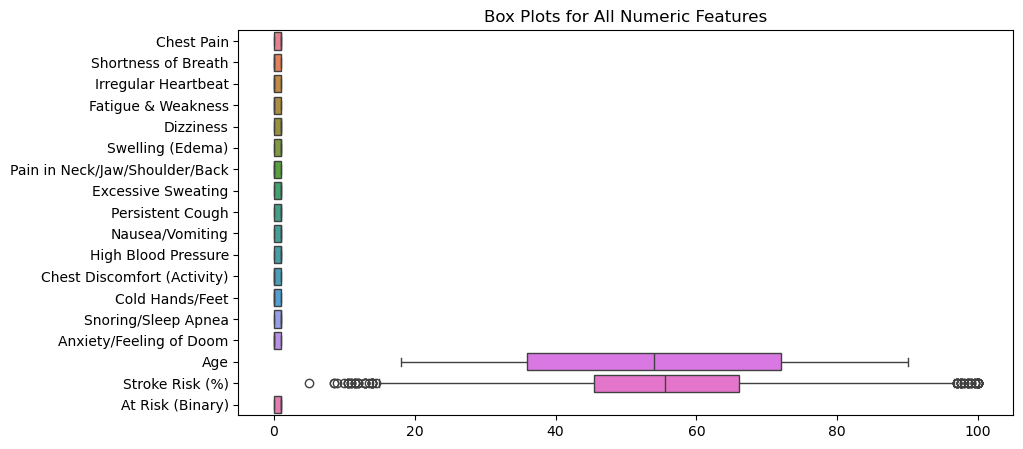

In [14]:
#Check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (exclude categorical)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for all numeric features
plt.figure(figsize=(10, 5))  # Adjust figure size
sns.boxplot(data=df[numeric_cols], orient="h")  # Horizontal boxplots
plt.title("Box Plots for All Numeric Features")
plt.show()

In [15]:
for z in df.columns:
    if z not in  ["Age",'Stroke Risk (%)','At Risk (Binary)']:
        print(z)


Chest Pain
Shortness of Breath
Irregular Heartbeat
Fatigue & Weakness
Dizziness
Swelling (Edema)
Pain in Neck/Jaw/Shoulder/Back
Excessive Sweating
Persistent Cough
Nausea/Vomiting
High Blood Pressure
Chest Discomfort (Activity)
Cold Hands/Feet
Snoring/Sleep Apnea
Anxiety/Feeling of Doom


In [16]:
ftrs=[]
for z in df.columns:
    if z not in  ["Age",'Stroke Risk (%)','At Risk (Binary)']:
        ftrs_nc=['Age',z]
        ftrs.append(ftrs_nc)
X = df.drop(columns=["At Risk (Binary)","Stroke Risk (%)"])
y = df["At Risk (Binary)"]


In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [18]:
# Define models 
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)}

print("\n=== Cross-Validation Results ===")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    auc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

    print(f"{name}: AUC = {np.mean(auc_scores):.5f} ± {np.std(auc_scores):.5f} | "
          f"F1 = {np.mean(f1_scores):.5f} ± {np.std(f1_scores):.5f}")


=== Cross-Validation Results ===
Logistic Regression: AUC = 1.00000 ± 0.00000 | F1 = 0.99768 ± 0.00062
Decision Tree: AUC = 0.85932 ± 0.00383 | F1 = 0.90058 ± 0.00259
Random Forest: AUC = 0.98964 ± 0.00029 | F1 = 0.95709 ± 0.00101


c:\Users\monasr\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:15:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\monasr\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:15:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\monasr\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:15:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\monasr\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:15:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

XGBoost: AUC = 0.99977 ± 0.00006 | F1 = 0.99546 ± 0.00067


c:\Users\monasr\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:15:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
print("\n=== Test Set Results ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # for AUC

    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    accuracy=accuracy_score(y_test, y_pred)
    cf=confusion_matrix(y_test, y_pred)
    print(f"{name}: AUC = {auc:.5f} | F1 = {f1:.5f} | Accuracy = {accuracy:.5f}")
    print()
    print(cf)
    print("-------------------------------------------------------------------------------------------------")


=== Test Set Results ===
Logistic Regression: AUC = 1.00000 | F1 = 0.99911 | Accuracy = 0.99884

[[ 7235    24]
 [    0 13435]]
-------------------------------------------------------------------------------------------------
Decision Tree: AUC = 0.86548 | F1 = 0.90567 | Accuracy = 0.87750

[[ 5990  1269]
 [ 1266 12169]]
-------------------------------------------------------------------------------------------------
Random Forest: AUC = 0.99046 | F1 = 0.95968 | Accuracy = 0.94738

[[ 6644   615]
 [  474 12961]]
-------------------------------------------------------------------------------------------------


c:\Users\monasr\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:16:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: AUC = 0.99985 | F1 = 0.99740 | Accuracy = 0.99662

[[ 7210    49]
 [   21 13414]]
-------------------------------------------------------------------------------------------------


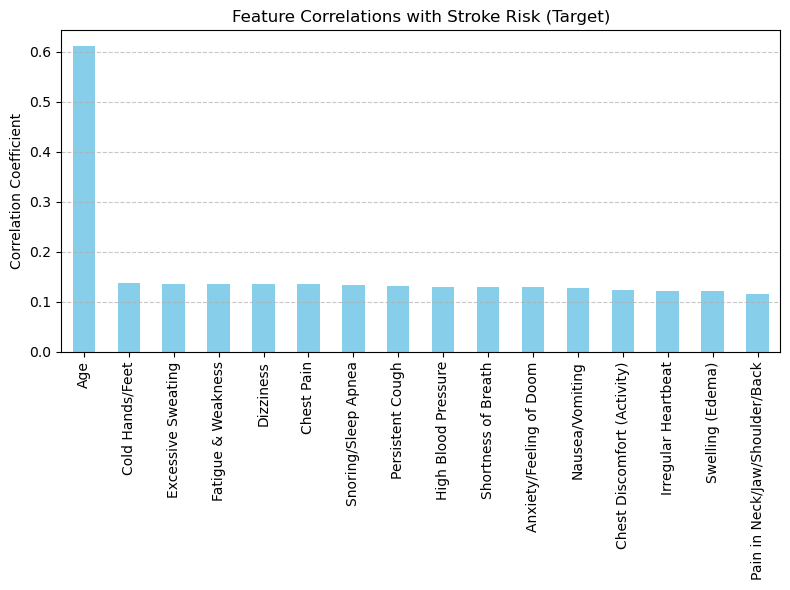

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,target
Chest Pain,1.000000,-0.008754,0.003746,-0.000562,0.006885,-0.004985,-0.002960,0.004564,0.001840,0.004948,0.001719,0.001231,0.001225,-0.004122,0.005233,0.008201,0.134184
Shortness of Breath,-0.008754,1.000000,0.001931,-0.000638,0.002278,-0.000611,-0.001888,0.001701,-0.005275,0.004290,0.011742,-0.000617,0.007761,0.002009,-0.001624,-0.001162,0.129367
Irregular Heartbeat,0.003746,0.001931,1.000000,0.000019,-0.007942,-0.003247,0.003750,0.005644,0.001261,-0.001182,-0.004411,-0.002913,-0.004823,0.002423,0.001755,-0.006728,0.121988
Fatigue & Weakness,-0.000562,-0.000638,0.000019,1.000000,-0.002556,0.000895,-0.002380,-0.001977,0.001509,0.001552,0.003542,0.001643,0.001555,0.001429,0.008549,-0.000204,0.134452
Dizziness,0.006885,0.002278,-0.007942,-0.002556,1.000000,-0.002402,0.004584,0.001963,-0.003388,0.002293,-0.000765,-0.002722,-0.003407,0.006150,-0.000749,0.000561,0.134324
Swelling (Edema),-0.004985,-0.000611,-0.003247,0.000895,-0.002402,1.000000,-0.000355,-0.000080,0.001891,0.003669,-0.006359,0.002655,-0.002055,-0.000766,-0.000174,-0.008224,0.120397
Pain in Neck/Jaw/Shoulder/Back,-0.002960,-0.001888,0.003750,-0.002380,0.004584,-0.000355,1.000000,-0.001629,0.005656,-0.006316,-0.001098,-0.006902,0.004783,-0.000890,-0.002792,-0.014437,0.115648
Excessive Sweating,0.004564,0.001701,0.005644,-0.001977,0.001963,-0.000080,-0.001629,1.000000,-0.008194,-0.002429,-0.004327,0.004820,-0.001087,0.006399,-0.001497,0.003449,0.136114
Persistent Cough,0.001840,-0.005275,0.001261,0.001509,-0.003388,0.001891,0.005656,-0.008194,1.000000,-0.003585,0.002713,-0.005396,0.002965,0.009879,-0.002803,-0.002810,0.131754
Nausea/Vomiting,0.004948,0.004290,-0.001182,0.001552,0.002293,0.003669,-0.006316,-0.002429,-0.003585,1.000000,-0.005032,-0.002543,-0.000144,0.010169,0.001302,-0.005491,0.126652


In [20]:
train_corr_df = pd.concat([X_train.copy(), y_train.rename('target')], axis=1)
corr = train_corr_df.corr(numeric_only=True)

# Get correlations with target, drop self-correlation, and sort
target_corr = corr['target'].drop('target').sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
target_corr.plot(kind='bar', color='skyblue')
plt.title("Feature Correlations with Stroke Risk (Target)")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
corr


Group 1 — Outliers:
[]

Group 0 — Outliers:
[78 80 81 79 83 90 86 83 76 85 87 87 77 79 84 80 78 82 84 78 87 77 77 82
 77 83 85 87 84 77 88 81 76 83 79 77 77 77 80 77 85 84 88 85 86 83 76 79
 80 76 76 85 83 77 80 87 77 77 77 77 83 76 77 80 80 77 77 76 81 79 76 76
 77 84 81 83 78 83 83 76 79 76 84 76 84 85 76 86 86 80 78 81 83 76 86 80
 79 82 82 83 87 83 86 78 77 76 86 81 85 82 83 81 86 81 87 80 77 85 78 76
 76 81 83 86 81 76 85 77 87 78 82 85 82 84 77 76 86 77 85 76 82 76 77 77
 76 77 77 76 86 82 76 77 76 83 82 76 76 78 85 77 84 78 83 79 76 87 87 77
 79 81 79 77 80 79 87 77 76 82 83 77 82 77 86 85 85 76 77 77 86 86 85 90
 77 77 86 76 80 85 85 77 77 77 83 86 81 76 80 77 77 87 82 79 87 80 77 79
 78 76 87 85 77 78 76 85 77 80 78 82 80 80 79 77 76 76 86 77 76 76 79 77
 80 77 80 84 79 76 82 76 76 78 88 77 76 76 87 81 77 86 84 76 78 76 76 84
 76 76 78 77 82 78 76 77 78 80 78 77 84 80]


np.float64(20.0)

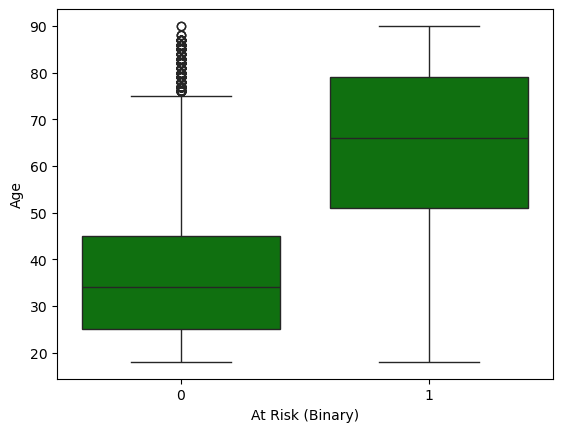

In [21]:
sns.boxplot(x="At Risk (Binary)", y="Age", data=df, color="green")
# Loop through each group (0 and 1)
for grp in df["At Risk (Binary)"].unique():
    group_data = df[df["At Risk (Binary)"] == grp]["Age"]

    # Calculate IQR (Interquartile Range)
    Q1 = group_data.quantile(0.25)
    Q3 = group_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = group_data[(group_data < lower_bound) | (group_data > upper_bound)]

    print(f"\nGroup {grp} — Outliers:")
    print(outliers.values)
IQR

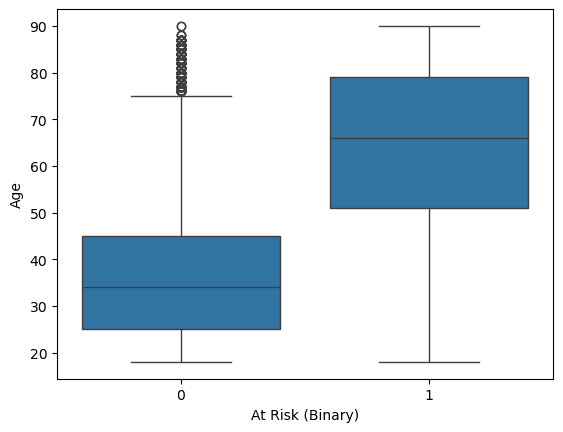

In [22]:
sns.boxplot(x=df["At Risk (Binary)"], y=df["Age"])
plt.show()

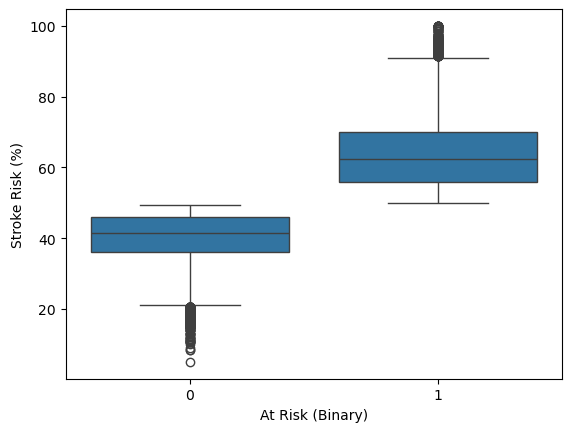

In [23]:
sns.boxplot(x=df["At Risk (Binary)"], y=df["Stroke Risk (%)"])
plt.show()

c:\Users\monasr\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:16:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


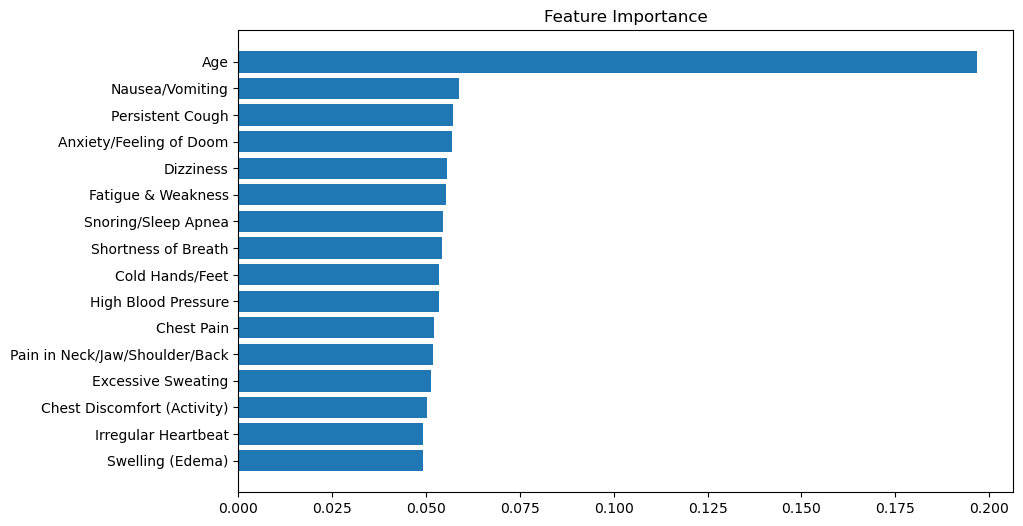

In [24]:
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42).fit(X_train, y_train)
importances = clf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.show()

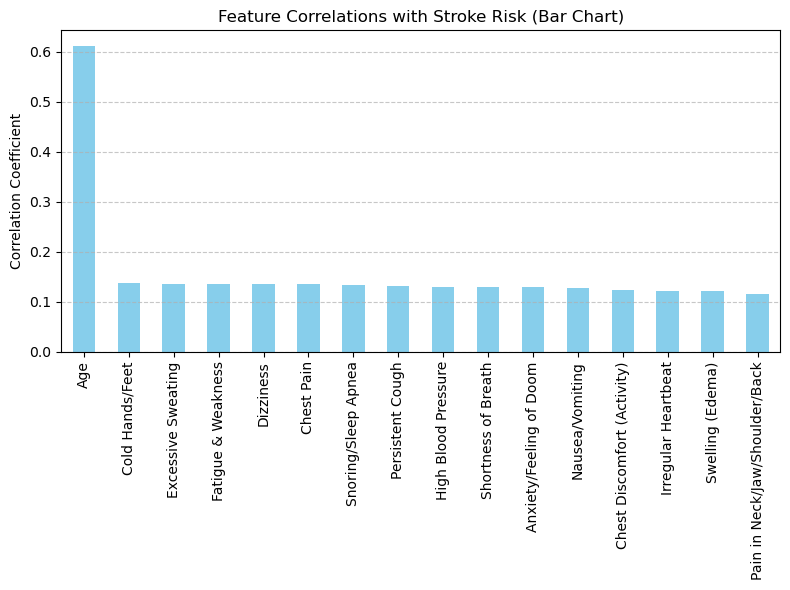

Age                               0.612238
Cold Hands/Feet                   0.136951
Excessive Sweating                0.136114
Fatigue & Weakness                0.134452
Dizziness                         0.134324
Chest Pain                        0.134184
Snoring/Sleep Apnea               0.133078
Persistent Cough                  0.131754
High Blood Pressure               0.130114
Shortness of Breath               0.129367
Anxiety/Feeling of Doom           0.129249
Nausea/Vomiting                   0.126652
Chest Discomfort (Activity)       0.122591
Irregular Heartbeat               0.121988
Swelling (Edema)                  0.120397
Pain in Neck/Jaw/Shoulder/Back    0.115648
Name: target, dtype: float64

In [25]:
plt.figure(figsize=(8,6))
target_corr.plot(kind='bar', color='skyblue')
plt.title("Feature Correlations with Stroke Risk (Bar Chart)")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
target_corr

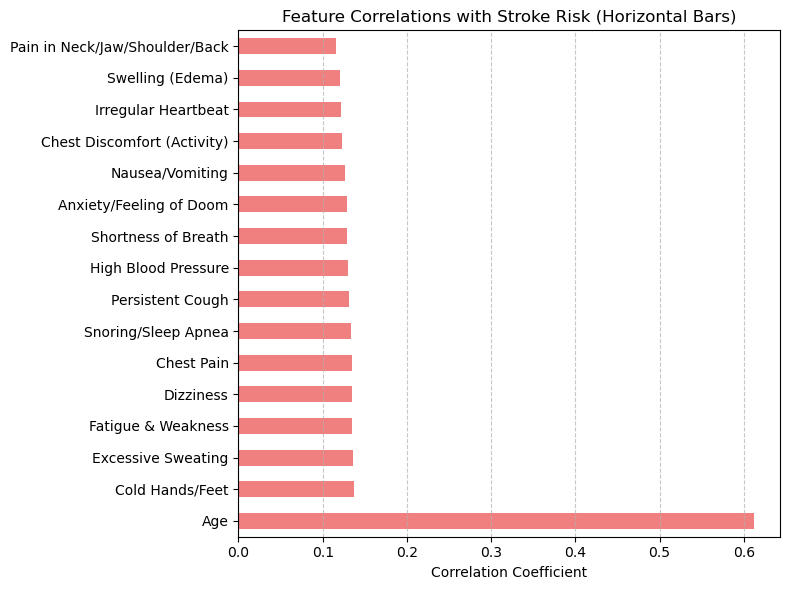

In [26]:
plt.figure(figsize=(8,6))
target_corr.plot(kind='barh', color='lightcoral')
plt.title("Feature Correlations with Stroke Risk (Horizontal Bars)")
plt.xlabel("Correlation Coefficient")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

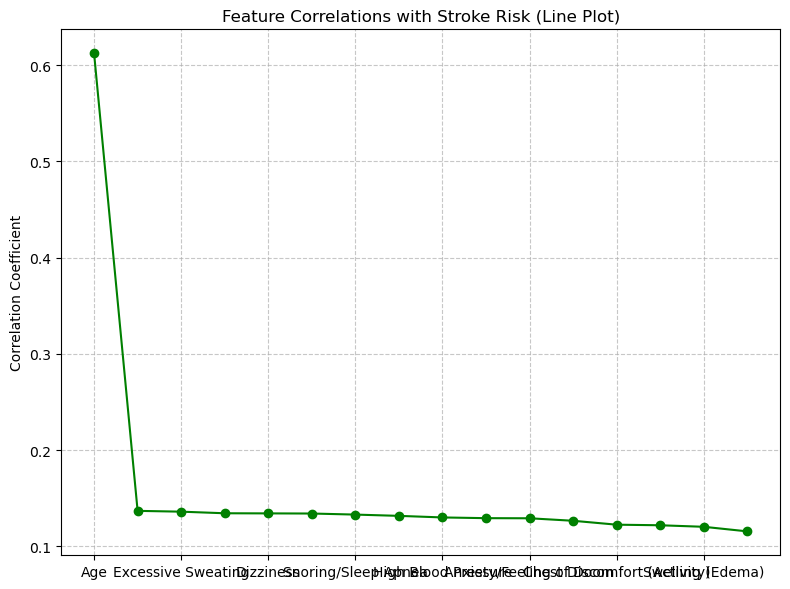

In [27]:
plt.figure(figsize=(8,6))
target_corr.plot(kind='line', marker='o', color='green')
plt.title("Feature Correlations with Stroke Risk (Line Plot)")
plt.ylabel("Correlation Coefficient")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


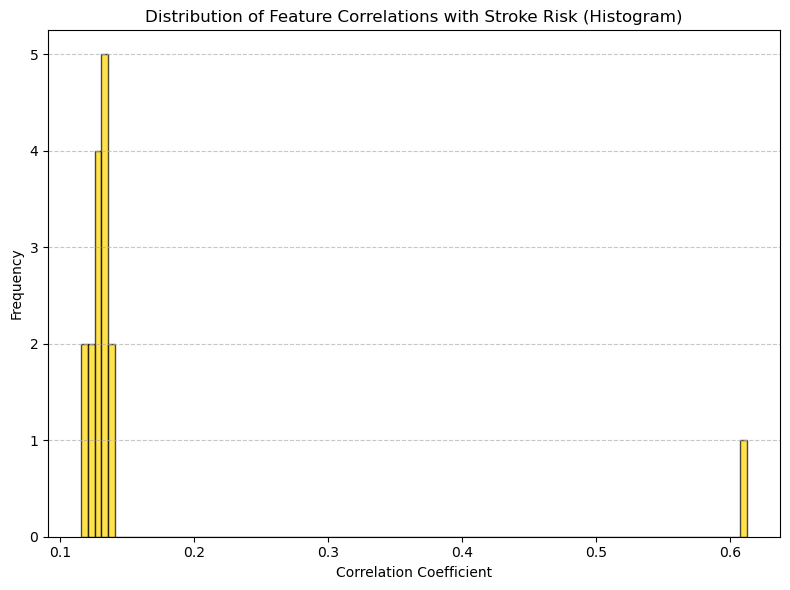

In [28]:
plt.figure(figsize=(8,6))
plt.hist(target_corr, bins=100, color='gold', edgecolor='black', alpha=0.7)
plt.title("Distribution of Feature Correlations with Stroke Risk (Histogram)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

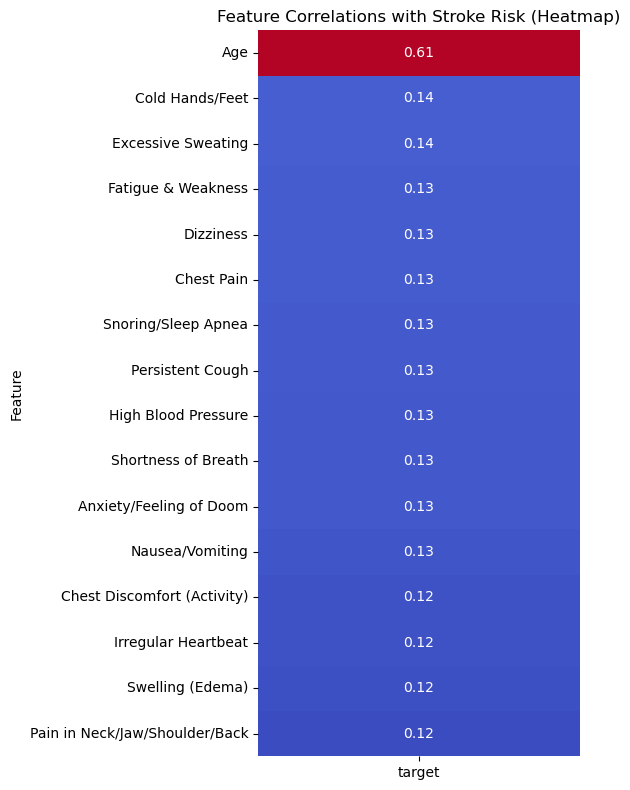

In [29]:
import seaborn as sns

plt.figure(figsize=(6,8))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Feature Correlations with Stroke Risk (Heatmap)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

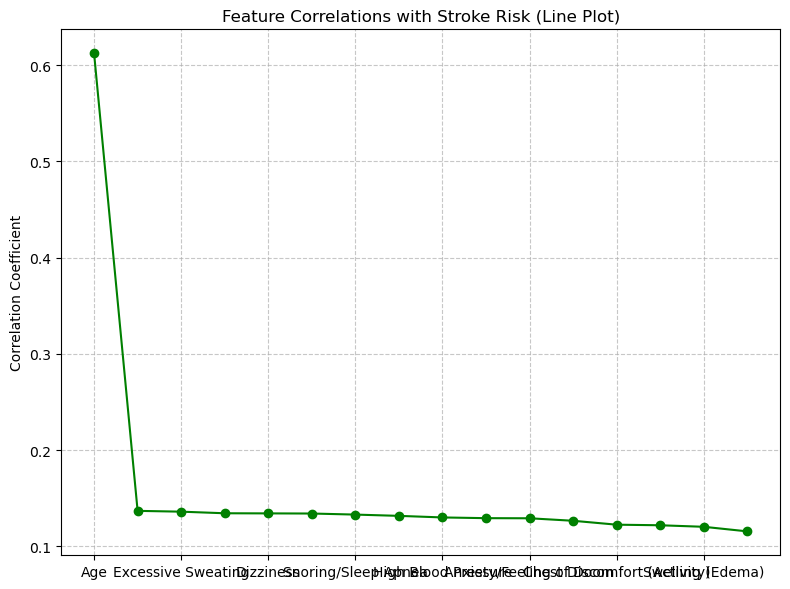

In [30]:
plt.figure(figsize=(8,6))
target_corr.plot(kind='line', marker='o', color='green')
plt.title("Feature Correlations with Stroke Risk (Line Plot)")
plt.ylabel("Correlation Coefficient")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


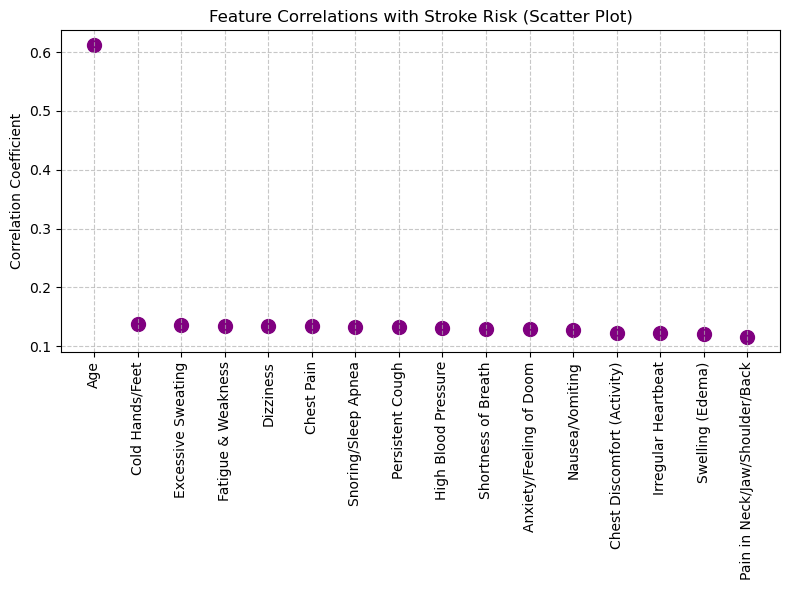

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(target_corr.index, target_corr.values, color='purple', s=100)
plt.title("Feature Correlations with Stroke Risk (Scatter Plot)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [32]:
df[(df["Age"] >= 45) & (df["Age"] <= 51)]["Age"].value_counts().sort_index().sum()/len(df)*100

np.float64(9.572478580437524)

In [33]:
# Group 0 (Not at risk)
q3_group0 = df[df["At Risk (Binary)"] == 0]["Age"].quantile(0.75)

# Group 1 (At risk)
q1_group1 = df[df["At Risk (Binary)"] == 1]["Age"].quantile(0.25)

print(f"Q3 (group 0 - Not at risk): {q3_group0}")
print(f"Q1 (group 1 - At risk): {q1_group1}")


Q3 (group 0 - Not at risk): 45.0
Q1 (group 1 - At risk): 51.0


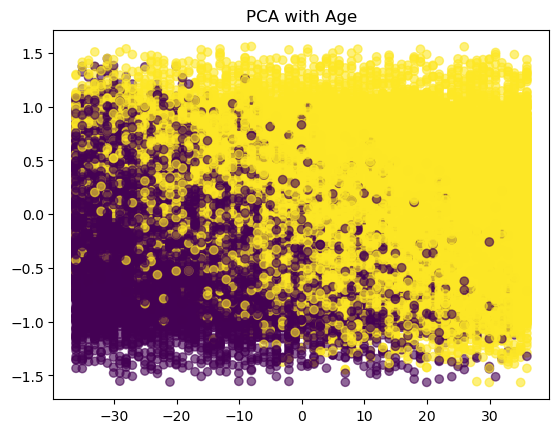

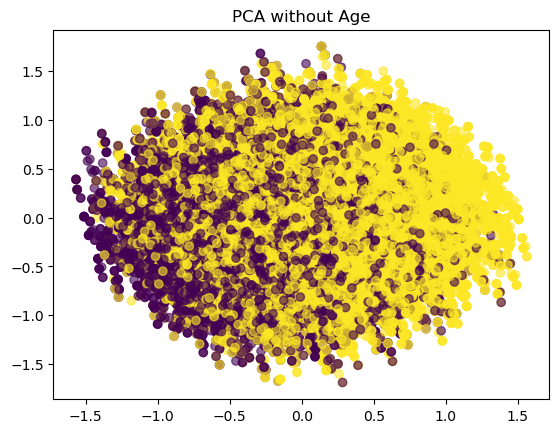

In [34]:
from sklearn.decomposition import PCA

# With Age
X_with_age=X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_with_age)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,  alpha=0.6)
plt.title("PCA with Age")
plt.show()

# Without Age
X_without_age=X.drop(columns=['Age'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_without_age)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.6)
plt.title("PCA without Age")
plt.show()

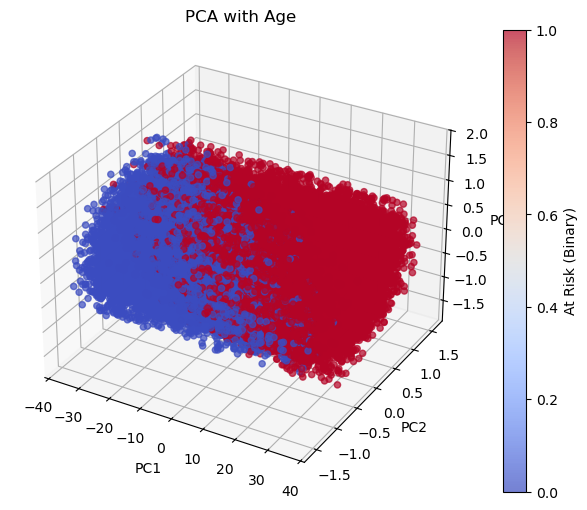

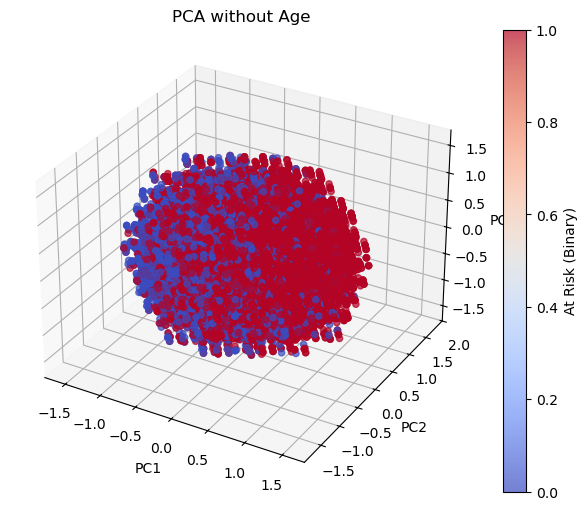

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # لتفعيل الرسم ثلاثي الأبعاد

# ---- PCA مع العمر ----
X_with_age = X
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_with_age)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')  # إنشاء محور 3D
sc = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap='coolwarm', alpha=0.7)
ax.set_title("PCA with Age")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(sc, label='At Risk (Binary)')
plt.show()

# ---- PCA بدون العمر ----
X_without_age = X.drop(columns=['Age'])
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_without_age)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap='coolwarm', alpha=0.7)
ax.set_title("PCA without Age")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(sc, label='At Risk (Binary)')
plt.show()


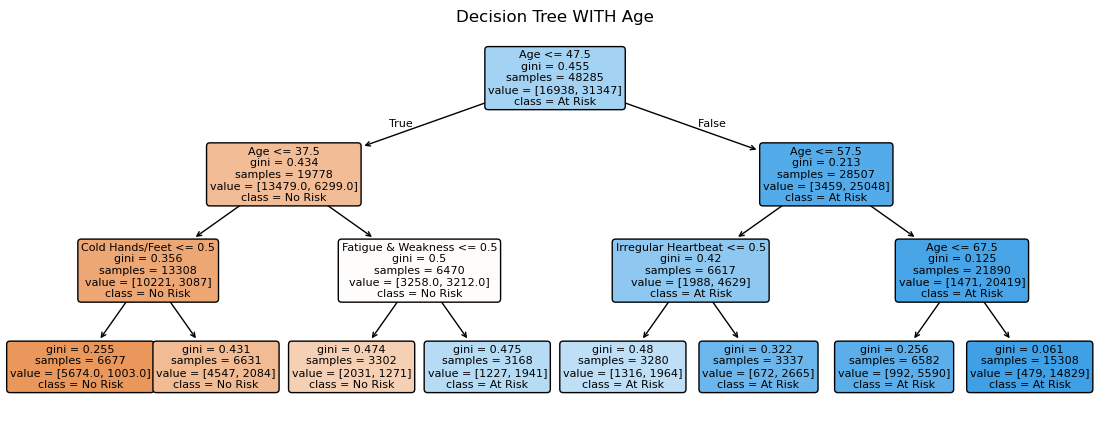

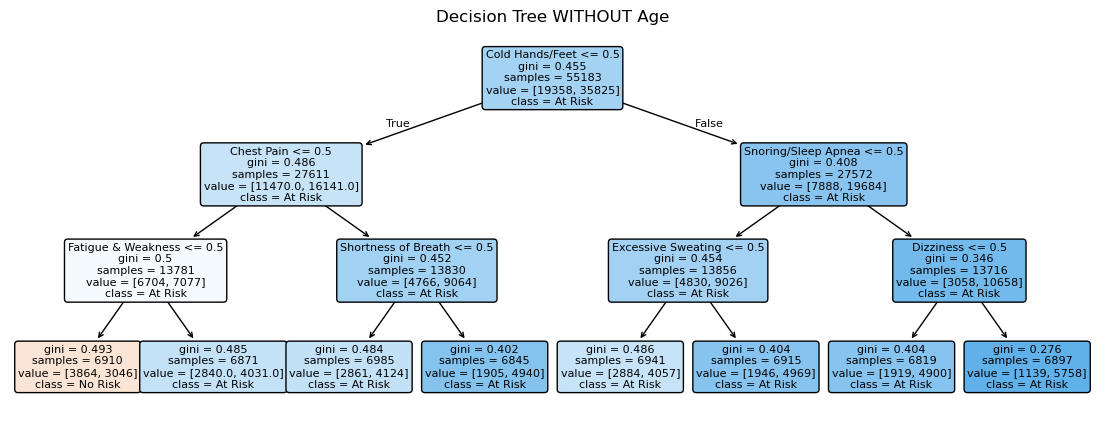

In [36]:
# let take one more look on the tree based method - we will use DT model for easier visualisation
# the model will probably use the age as the first split and build strong trees, right?

X_no_age = X.drop(columns=['Age'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_no_age, y, test_size=0.2, stratify=y, random_state=42)

tree_with_age = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_with_age.fit(X_train, y_train)

tree_without_age = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_without_age.fit(X_train2, y_train2)

# Tree WITH Age
plt.figure(figsize=(14, 5))
plot_tree(tree_with_age,feature_names=X.columns,class_names=['No Risk', 'At Risk'],filled=True,rounded=True,fontsize=8)
plt.title("Decision Tree WITH Age")
plt.show()

# Tree WITHOUT Age
plt.figure(figsize=(14, 5))
plot_tree(tree_without_age,feature_names=X_no_age.columns,class_names=['No Risk', 'At Risk'],filled=True,rounded=True,fontsize=8)
plt.title("Decision Tree WITHOUT Age")
plt.show()

# Conclusion
All models had strong performance, with XGBoost and Log Reg having near-perfect results. The consistency between cross-validation and test set performance shows that these models are not overfitting and the dataset likely has strong predictive signal, possibly from a dominant feature like Age. After examining feature correlation, and verifying the absence of data leakage, we conclude that this is a pretty separated dataset due to the dominant feature Age that allows for highly accurate predictions.

The perfect age-based separation (no overlap between classes) hints at synthetic curation, even if medically inspired, which could limit real-world applicability.

In [37]:
import joblib

# درّب كل موديل على كامل بيانات التدريب
best_model = None
best_auc = 0
best_name = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)

    print(f"{name} test AUC: {auc:.4f}")

    if auc > best_auc:
        best_auc = auc
        best_model = model
        best_name = name

print(f"\n✅ Best model is {best_name} with AUC = {best_auc:.4f}")

# احفظ الموديل المختار + ترتيب الأعمدة علشان GUI يعرف يبني الإدخال
bundle = {
    "model": best_model,
    "features": list(X_train.columns)
}

joblib.dump(bundle, "stroke_model.joblib")
print("💾 Model saved to stroke_model.joblib")


Logistic Regression test AUC: 1.0000
Decision Tree test AUC: 0.8655
Random Forest test AUC: 0.9905


c:\Users\monasr\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:16:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost test AUC: 0.9998

✅ Best model is Logistic Regression with AUC = 1.0000
💾 Model saved to stroke_model.joblib


In [38]:

import joblib
bundle = joblib.load("stroke_model.joblib")
model = bundle["model"]
features = bundle["features"]


In [39]:
print(bundle["features"])


['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat', 'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)', 'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating', 'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure', 'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea', 'Anxiety/Feeling of Doom', 'Age']
